#**CLASSIFICATION** : ENTITES NOMMEES-TRUE_FALSE_OTHER_MIXTURE :

**Membres:** Hadjoudja Bachir (21811363), Zeggar Rym (21909615), Bendahmane Rania (21811387), Labiad Youcef (21710780).

In [ ]:
#les imports utilisés
import sys
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import time
import warnings
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer 
from nltk import word_tokenize
import spacy
from spacy import displacy
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support as score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from torch.utils.data import Dataset, DataLoader, random_split
from torch import Tensor
from torch.nn import Linear, ReLU, Sigmoid, Module, BCELoss
from torch.optim import SGD
from torch.nn.init import kaiming_uniform_, xavier_uniform_
from tabulate import tabulate
from google.colab import drive
# Sickit learn met régulièrement à jour des versions et indique des futurs warnings. 
# Ces deux lignes permettent de ne pas les afficher.
warnings.filterwarnings("ignore", category=FutureWarning)

# Téléchargez les données nécessaires pour certaines fonctions de traitement du texte en utilisant nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

autorisation

In [ ]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
my_local_drive='/content/gdrive/My Drive'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive
%ls

%pwd

/content/gdrive/My Drive
 🇬🇷🇬🇷/
'🇵🇱 '/
 0341_001.pdf
 0341_001.pdf.gdoc
 141APPLE/
 20220513_122210.jpg
'ADHE-2020-a0ad-1 (1).pdf'
 ADHE-2020-a0ad-1.pdf
 AGL/
 ARTICLE.gdoc
'attestation d employeur 001.jpg'
'ATTESTATION-DE-PISE-EN-CHARGE ++.docx'
 attestation_hebergement-rania.pdf
 attestationnn_d_hebergement_etudiant.pdf
 Avis_d_impot_2020_sur_les_revenus_2019.pdf
 Banque/
'BENDAHMANE RANIA.gdoc'
 Bershka_40117332158.gdoc
 Bershka_40117332158.pdf
'BIGDATA OFFICIEL.gdoc'
 Bruxelles/
'CamScanner 04-15-2022 12.41.pdf'
'CamScanner 09-22-2020 12.22.30_1.pdf'
'cas raphia.pdf'
'CCF17112019_00000 (1).jpg'
 CCF17112019_00000.jpg
'CCI17112019_00000 (1).bmp'
 CCI17112019_00000.bmp
'CCI17112019_00001 (1).bmp'
 CCI17112019_00001.bmp
'CCI17112019_00002 (1).bmp'
 CCI17112019_00002.bmp
 CCI17112019_00003.bmp
 CCI17112019_00004.bmp
'CCI17112019_00005 (1).bmp'
 CCI17112019_00005.bmp
'Chill_Tea Projet 2020-2021'/
 CI_REO_dossier_inscriptions.pdf
'Colab Notebooks'/
 COMBI/
'Copie de FakeNEWS.ipynb'
'corr

'/content/gdrive/My Drive'

La fonction qui sera utilisée pour les prétraitements: MyCleanText 
* Mettre le texte en minuscule
* Se débarasser des stopwords
* Se débarasser des nombres
* Stemmatisation
* Lemmatisation ..

La fonction MyshowAllScores prend le y_test et le y_predict, affiche l'accuracy et le classification report avec la matrice de confusion.

In [ ]:
#...................................................Fonction MyCleanText .............................................................................
# mettre en minuscule
#enlever les stopwords
#se debarasser des nombres
#stemmatisation
#lemmatisation 
#......................................................................................................................................................


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#liste des stopwords en anglais
stop_words = set(stopwords.words('english')) 

def MyCleanText(X,
                lowercase=False, #mettre en minuscule
                removestopwords=False, #supprimer les stopwords
                removedigit=False, #supprimer les nombres
                getstemmer=False, #conserver la racine des termes
                getlemmatisation=False #lemmatisation des termes
                ):
  #conversion du texte d'entrée en chaîne de caractères
    sentence=str(X)
    #suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]

    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
  
    return sentence   

def MyshowAllScores(y_test,y_pred):
  classes= np.unique(y_test)
  print("Accuracy : %0.3f"%(accuracy_score(y_test,y_pred)))
  print("Classification Report")
  print(classification_report(y_test,y_pred,digits=5))    
  cnf_matrix = confusion_matrix(y_test,y_pred)
  disp=ConfusionMatrixDisplay(cnf_matrix,display_labels=classes)
  disp.plot()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


La classe TextNormalizer qui contiendra la fonction MyCleanText.

Fit_transform de mon corpus propre.

In [ ]:
#..................................................Etape 1 : prétraitement du texte ...................................................................................................
#...................................................Class TextNormalizer  .............................................................................
#fit_transform de mon corpus propre 
#......................................................................................................................................................

from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres  
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False # lemmatisation des termes  
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    


##**1ere classification :  True/False VS Mixture/OTHER**

###**Etape 1 : Préparer les données**
* Charger et préparer les données à partir  des 2 fichiers csv
* Affichages pour tester si cela a bien été fait


In [ ]:
dftrain1 = pd.read_csv("/content/gdrive/MyDrive/newsTrain2.csv", names=['id','text','title','rating'], header=0,sep=',', encoding='utf8')
dftrain1.reset_index(drop = True, inplace = True)

dftrain2 = pd.read_csv("/content/gdrive/MyDrive/newsTrain_-_newsTrain.csv", names=['id','text','title','rating'], header=0,sep=',', encoding='utf8')
dftrain2.reset_index(drop = True, inplace = True)


# concaténer les deux dataframes en ajoutant les lignes du deuxième à la fin du premier
dftrainbase = pd.concat([dftrain1, dftrain2], ignore_index=True)
dftrain=dftrainbase

#On crée une colonne regroupe qui va mettre dans les lignes là où a true ou bien false la valeur TRUE/FALSE et OTHER ça laisse
#dftrain['truefalse'] = dftrain['rating'].apply(lambda x: 'TRUE/FALSE' if x in ['TRUE', 'FALSE'] else '')
#On crée une colonne regroupe qui va mettre dans les lignes là où a true ou bien false la valeur TRUE/FALSE et OTHER ça laisse
#dftrain['mixtureother'] = dftrain['rating'].apply(lambda x:'MIXTURE/OTHER' if x in ['MIXTURE', 'OTHER'] else '')

dftrain['regrouped'] = dftrain['rating'].apply(lambda x:'TRUE/FALSE' if x in ['TRUE', 'FALSE'] else 'MIXTURE/OTHER')



print("Echantillon de mon dataset \n")
print(dftrain.sample(n=10))
print("\n")
print("Quelques informations importantes \n")
dftrain.info()
print("\n")
X_text=dftrain["text"]
X_title=dftrain["title"]


print("le texte est")
display(X_text)
print("\n")
print("le titre est")
display(X_title)
print("\n")
y=dftrain.iloc[0:,-1]
print("voici la dernière case de rating")
display(y)
print("\n")
print("la taille de Xt est",X_text.shape)
print("\n")
print(" y EST " ,y)
print("\n")
y = y.str.lower()
print("Les valeurs de true et false sont:\n", y.value_counts())


Echantillon de mon dataset 

            id                                               text  \
375   6a72f5c5  James Humphrey Terwilliger Woods, conservative...   
2209  721fde78  FOR IMMEDIATE RELEASE: Contact: Jennie Kennedy...   
2127  6378a0ff  A coalition of civil society groups has descri...   
1787  8.00E+25  A coalition of civil society groups has descri...   
1746  b4b6057f  SHARE Madison - Gov. Scott Walker's proposal t...   
268   a85f1aac  US Under Military Law, Congress Arrested, War ...   
608   53d111d0  The primary school population in England has c...   
841   f1ad8b82  Democrats have said they only intend to restor...   
736   43174fe2  What is occurring on Wall Street right now is ...   
2212  0c5a27ba  top cancer researchers harvard epa agree fluor...   

                                                  title   rating  \
375   James Woods, Actor, Patriot, and Trump Support...    FALSE   
2209  Only 3% of Trump Voters Believe Joe Biden Is L...  mixture   
2127   

0       Distracted driving causes more deaths in Canad...
1       Missouri politicians have made statements afte...
2       Home Alone 2: Lost in New York is full of viol...
3       But things took a turn for the worse when riot...
4       It’s no secret that Epstein and Schiff share a...
                              ...                        
2523    More than four million calls to the taxman are...
2524    More under-18s are being taken to court for se...
2525    The Government’s much vaunted Help to Buy Isa ...
2526    The late Robin Williams once called cocaine “G...
2527    The late Robin Williams once called cocaine “G...
Name: text, Length: 2528, dtype: object



le titre est


0       You Can Be Fined $1,500 If Your Passenger Is U...
1           Missouri lawmakers condemn Las Vegas shooting
2       CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...
3       Obama’s Daughters Caught on Camera Burning US ...
4       Leaked Visitor Logs Reveal Schiff’s 78 Visits ...
                              ...                        
2523    Taxman fails to answer four million calls a ye...
2524    Police catch 11‑year‑olds being used to sell d...
2525    Help to Buy Isa scandal: 500,000 first-time bu...
2526             A coke-snorting generation of hypocrites
2527             A coke-snorting generation of hypocrites
Name: title, Length: 2528, dtype: object



voici la dernière case de rating


0          TRUE/FALSE
1       MIXTURE/OTHER
2       MIXTURE/OTHER
3          TRUE/FALSE
4          TRUE/FALSE
            ...      
2523       TRUE/FALSE
2524       TRUE/FALSE
2525       TRUE/FALSE
2526       TRUE/FALSE
2527       TRUE/FALSE
Name: regrouped, Length: 2528, dtype: object



la taille de Xt est (2528,)


 y EST  0          TRUE/FALSE
1       MIXTURE/OTHER
2       MIXTURE/OTHER
3          TRUE/FALSE
4          TRUE/FALSE
            ...      
2523       TRUE/FALSE
2524       TRUE/FALSE
2525       TRUE/FALSE
2526       TRUE/FALSE
2527       TRUE/FALSE
Name: regrouped, Length: 2528, dtype: object


Les valeurs de true et false sont:
 true/false       1578
mixture/other     950
Name: regrouped, dtype: int64


Le jeu de données étant déséquilibré, on a pensé à appliquer le downsampling pour équilibrer nos données. on séléctionne des lignes aléatoirement de TRUE/FALSE de telle sorte que le nombre de lignes de TRUE/FALSE soit = au nbr de lignes de MIXTURE/OTHER. et on mélange le DataFrame

In [ ]:
#On applique du sous-échantillonnage (downsampling) : car on a plus de FALSE (578) que des TRUE (211) 
# Séparer les classes en deux dataframes
df_false_true = dftrain[dftrain['regrouped'] == 'TRUE/FALSE']
df_other_mixture = dftrain [dftrain['regrouped'] == 'MIXTURE/OTHER']

# Sous-échantillonner la classe majoritaire (FALSE) pour obtenir un nombre égal d'échantillons pour chaque classe
df_subsampled = df_false_true.sample(n=len(df_other_mixture), random_state=42)

# Concaténer les deux dataframes
dftrain = pd.concat([df_subsampled, df_other_mixture])

# Mélanger aléatoirement les données
dftrain = dftrain.sample(frac=1, random_state=42)

X_text=dftrain.iloc[0:,1:2]
X_title=dftrain.iloc[0:,2:3]

print("le texte est")
display(X_text)
print("le titre est")
display(X_title)

y=dftrain.iloc[0:,-1]
print("le y est")
display(y)
print("la taille de X_text est",X_text.shape)
print("la taille de y_train est " ,y.shape)
print("les valeurs de TRUE et FALSE maintenant sont " ,y.value_counts())

le texte est


,text
847,Also on the naughty list were Christmas carols...
447,The number of people applying for UK universit...
2243,"Unvaccinated Children Pose No Risk To Anyone, ..."
1202,Australia’s Great Barrier Reef has worst coral...
1059,One in ten patients admitted to hospital are s...
...,...
637,As Democrats basked in the glory of their take...
1022,HON. STEFAN I. MYCHAJLIW ERIE COUNTY COMPTROLL...
1515,We’ve reported on numerous events identified i...
1432,"The 2021 Act on Climate, legislation sponsored..."


le titre est


,title
847,Principal banned candy canes because 'J' shape...
447,On the Capitol: Part-time pay for part-time Le...
2243,One of the strengths–and weaknesses–of a Weste...
1202,Australia’s Great Barrier Reef has worst coral...
1059,"Hospitals deluged by 5,000 diabetics a DAY: On..."
...,...
637,UK inflation soars to two-year high
1022,NaN
1515,BREAKING EXCLUSIVE: System ‘Glitch’ Also Uncov...
1432,State of Rhode Island General Assembly


le y est


847     MIXTURE/OTHER
447        TRUE/FALSE
2243       TRUE/FALSE
1202       TRUE/FALSE
1059    MIXTURE/OTHER
            ...      
637     MIXTURE/OTHER
1022    MIXTURE/OTHER
1515       TRUE/FALSE
1432    MIXTURE/OTHER
628     MIXTURE/OTHER
Name: regrouped, Length: 1900, dtype: object

la taille de X_text est (1900, 1)
la taille de y_train est  (1900,)
les valeurs de TRUE et FALSE maintenant sont  MIXTURE/OTHER    950
TRUE/FALSE       950
Name: regrouped, dtype: int64


### **Etape 2 : Classification selon la colonne TITRE**


Tests de Classification pour trouver le meilleur classifieur, les meilleurs paramètres de prétraitement et les meilleurs hyper_paramètres.

Avant de classifier on applique les entités nommées, Cette fonction utilise Spacy pour extraire les entités nommées à partir d'une liste de textes et les stocke dans une liste pour être affichées avec leurs labels correspondants.

In [ ]:

nlp = spacy.load("en_core_web_sm")
texte=dftrain['title']
#Créer une liste pour stocker les entités nommées
entities = []
# Traiter chaque texte individuellement et ajouter les entités à la liste
for phrase in texte:
    phrase_str = str(phrase)  # Convertir l'élément en chaîne de caractères
    doc = nlp(phrase_str)
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))


# Afficher les entités nommées
for entity in entities:
    print(entity[0], entity[1])
    




Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Fox News ORG
Jeanine Show PERSON
Newton GPE
One CARDINAL
five CARDINAL
Britain GPE
less than 50 CARDINAL
Trump ORG
second Impeachment Trial ORG
the day DATE
House ORG
U.S. GPE
Utah GPE
3rd ORDINAL
Jason Chaffetz PERSON
the House Rules ORG
OAN ORG
Jack Posobiec PERSON
Donald Trump PERSON
second ORDINAL
Senate ORG
January 6 DATE
Congress ORG
62% PERCENT
Dan Jarvis PERSON
Winter DATE
the Iowa Caucuses ORG
Results Delayed PERSON
NHS ORG
two CARDINAL
each DAY DATE
Wisconsin GPE
Newly ORG
the Department of Instruction ORG
the past year DATE
Wisconsin GPE
2nd DATE
41st ORDINAL
more than half CARDINAL
today DATE
the Walker Administration ORG
Democratic Party of Wisconsin Chair ORG
Martha Laning PERSON
Thursday DATE
last year DATE
State ORG
Scott Walker PERSON
Wisconsin GPE
second ORDINAL
five days DATE
Walker’s ORG
State ORG
the last six years DATE
36 CARDINAL
22.0 CARDINAL
20.0 CARDINAL
Wisconsin GPE
Midwest LOC
Ken

Exemple d'affichage graphique des entités nommées d'un texte

In [ ]:
nlp = spacy.load("en_core_web_sm")
text = dftrain['title'].iloc[3]  # Choisir le premier texte comme exemple
doc = nlp(text)

displacy.render(doc, style="ent", jupyter=True)

Cette fonction a pour but d'ajouter le type d'entité de chaque token détecté à coté de chaque entité détéctée dans le texte qu'elle prend en entrée, et retourne le texte modifié avec les informations ajoutées sur les entités nommées.

In [ ]:
def add_entity_name(text):
    if text is None or pd.isna(text):
        return ""

    doc = nlp(text)
    # Créer une liste pour stocker les nouveaux tokens
    nouveaux_tokens = []

    # Parcourir les tokens et ajouter des informations selon le type d'entité
    for token in doc:
        if token.ent_type_:
            # Ajouter le nom de l'entité (type d'entité) à côté de l'entité
            nouveaux_tokens.append(f"{token.text} ({token.ent_type_})")
        else:
            nouveaux_tokens.append(token.text)

    # Reconstruire le texte avec les informations ajoutées
    nouveau_texte = " ".join(nouveaux_tokens)
    return nouveau_texte

Application de la fonction précédente à la colonne "title" avec la méthode apply

In [ ]:
dftrain['title'] = dftrain['title'].astype(str)

# application de la fonction à la colonne "title"
dftrain['title'] = dftrain['title'].apply(add_entity_name)

print(dftrain['title'])

847     Principal banned candy canes because ' J ' sha...
447     On the Capitol (FAC) : Part - time pay for par...
2243    One (CARDINAL) of the strengths – and weakness...
1202    Australia (GPE) ’s Great (WORK_OF_ART) Barrier...
1059    Hospitals deluged by 5,000 (CARDINAL) diabetic...
                              ...                        
637     UK (GPE) inflation soars to two (DATE) - (DATE...
1022                                                  nan
1515    BREAKING EXCLUSIVE : System ‘ Glitch ’ Also Un...
1432    State of Rhode (ORG) Island (ORG) General (ORG...
628     President Buhari (PERSON) Never (PERSON) Said ...
Name: title, Length: 1900, dtype: object


On scinde les données de la colonne "title" en jeu d'apprentissage et jeu de test

In [ ]:

X=dftrain["title"]
print(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is",X_train)
print("y_train is",y_train)
print("X_test is",X_test)
print("y_test is",y_test)


847     Principal banned candy canes because ' J ' sha...
447     On the Capitol (FAC) : Part - time pay for par...
2243    One (CARDINAL) of the strengths – and weakness...
1202    Australia (GPE) ’s Great (WORK_OF_ART) Barrier...
1059    Hospitals deluged by 5,000 (CARDINAL) diabetic...
                              ...                        
637     UK (GPE) inflation soars to two (DATE) - (DATE...
1022                                                  nan
1515    BREAKING EXCLUSIVE : System ‘ Glitch ’ Also Un...
1432    State of Rhode (ORG) Island (ORG) General (ORG...
628     President Buhari (PERSON) Never (PERSON) Said ...
Name: title, Length: 1900, dtype: object
X_train is 1625    You Can be Fined $ 2,500 (MONEY) And Banned (O...
2164              - The (ORG) Washington (ORG) Post (ORG)
221     Why Does Fauci (PERSON) Hold (PERSON) Patents ...
721     A discussion of ‘ smokers ’ black lungs ’ star...
2413    We wo n’t let women be second (ORDINAL) class ...
                    

Ici, c'est une étape importante, on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:

# Utilisez la méthode ravel() pour transformer y_train en un tableau unidimensionnel
X_train = np.ravel(X_train)

np.random.seed(42)  # Set the random seed for NumPy

score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]


models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', SVC(random_state=42)))

# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))
    #pipeline.fit(X_train,y_train)
all_results=[]
scores=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    
#    print ("Evaluation de ",p)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train,y_train, cv=kfold, scoring=score)
    #print("Pour le classifieur",p[0],"on a un score de",cv_results.mean(),"et un écart type de",cv_results.std())
    scores.append(cv_results)
    names.append(p[0])

    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


print("all resultats", all_results)

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)
    # affichage des résultats
#print ('\nLe meilleur resultat : ',max(results))

Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('MultinomialNB', 0.8, 0.023938691314026636), ('LogisticRegression', 0.7881578947368422, 0.025446157376070665), ('KNN', 0.6407894736842106, 0.049600

On affiche les boites à moustache pour mieux visualiser les résultats

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

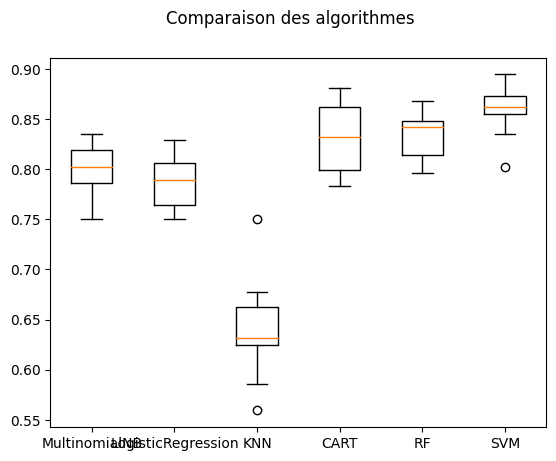

In [ ]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

y_train (1520,)
y_test (380,)
X_test (380,)
grid search fait
X_train (1520, 8440)
y_train (1520,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.873 

meilleur estimateur SVC(gamma=0.5, random_state=42) 

Accuracy : 0.882
Classification Report
               precision    recall  f1-score   support

MIXTURE/OTHER    0.91824   0.82022   0.86647       178
   TRUE/FALSE    0.85520   0.93564   0.89362       202

     accuracy                        0.88158       380
    macro avg    0.88672   0.87793   0.88004       380
 weighted avg    0.88473   0.88158   0.88090       380

Ensemble des meilleurs paramètres :
	C: 1.0
	gamma: 0.5
	kernel: 'rbf'
grid search fait
X_train (1520, 6959)
y_train (1520,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.873 

meilleur estimateur SVC(gamma=0.5, random_state=42) 

Accuracy : 0.887
Classification Report
               precision    recall  f1-score   support

MIXTURE/OTHER    0.92994   0.82022

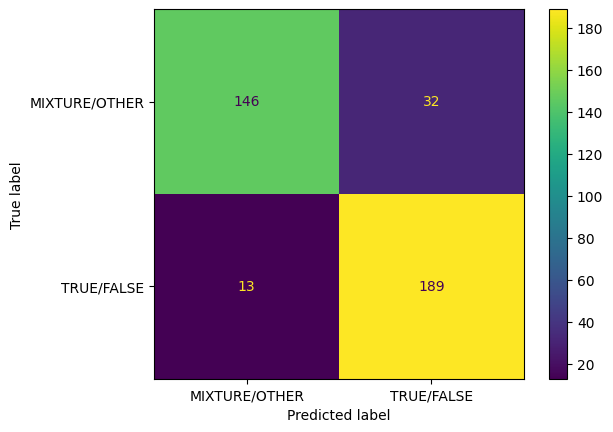

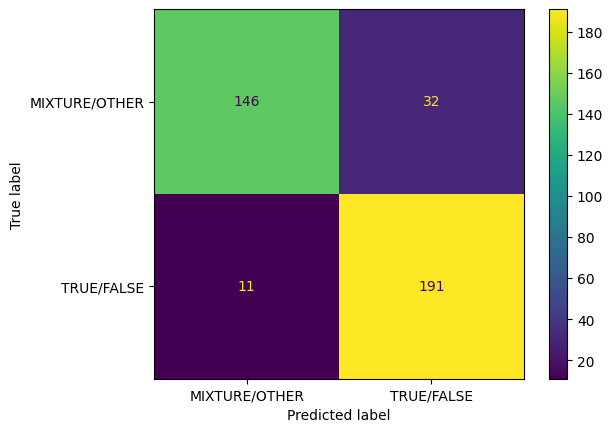

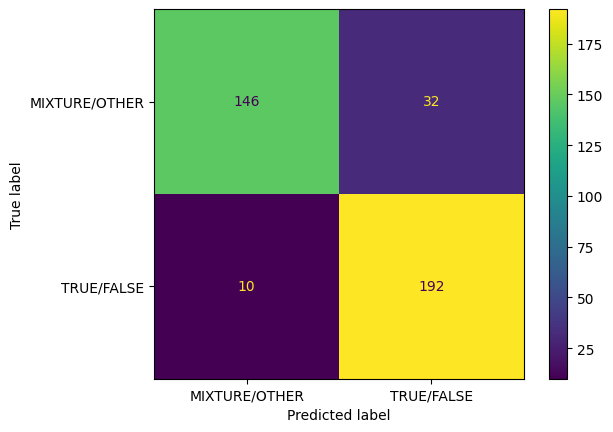

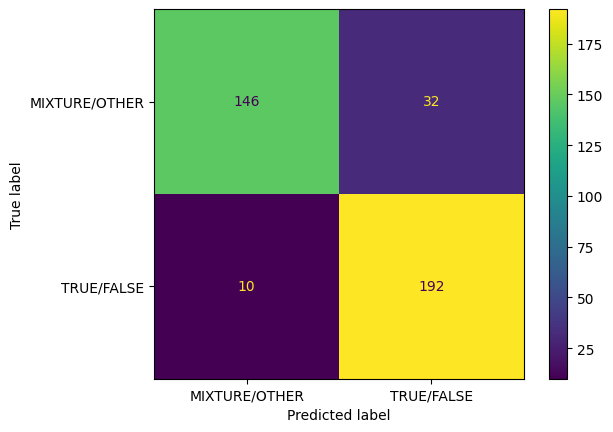

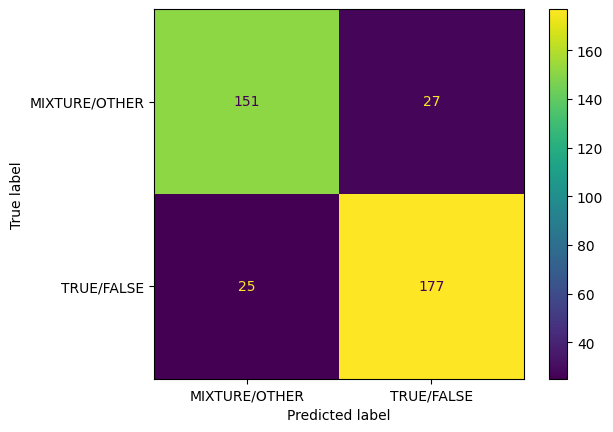

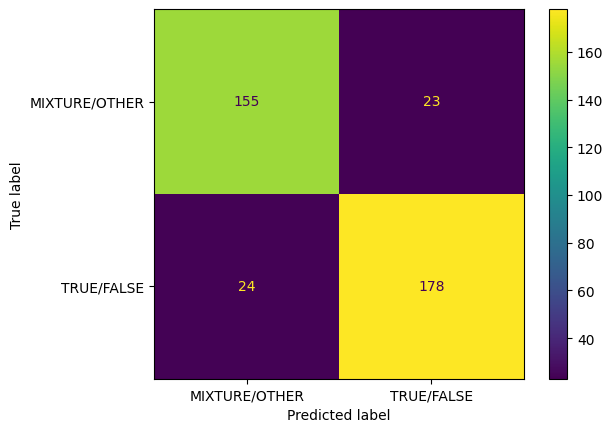

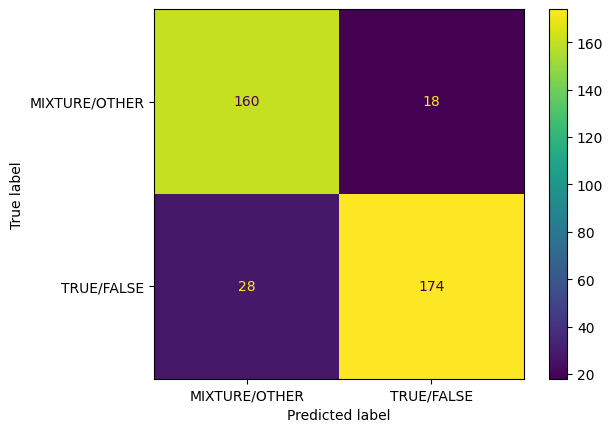

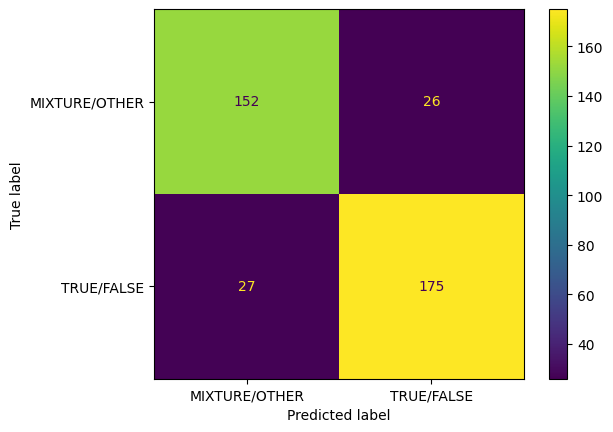

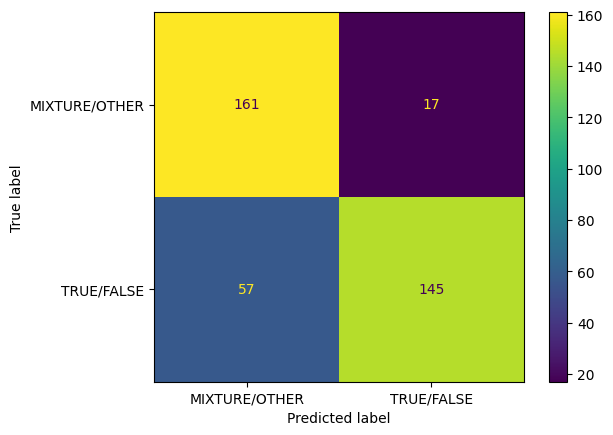

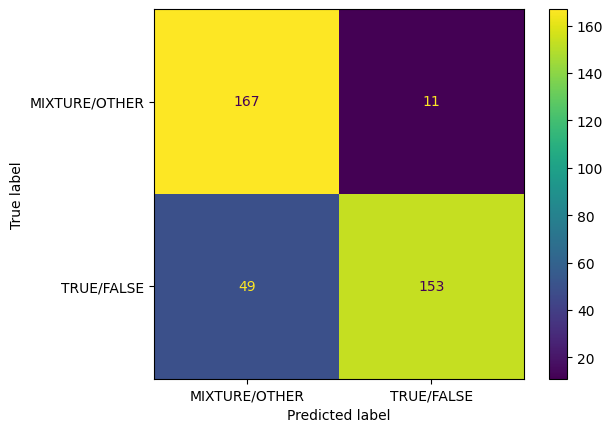

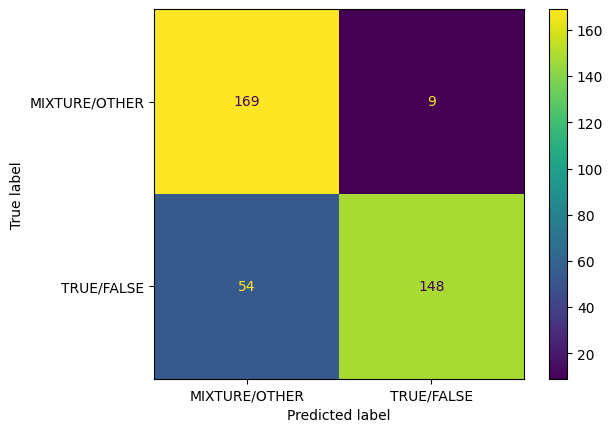

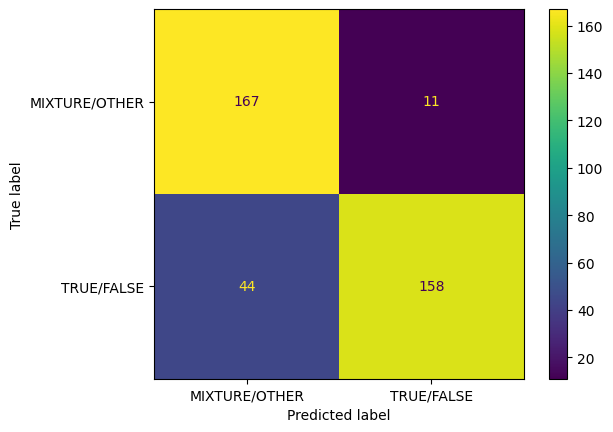

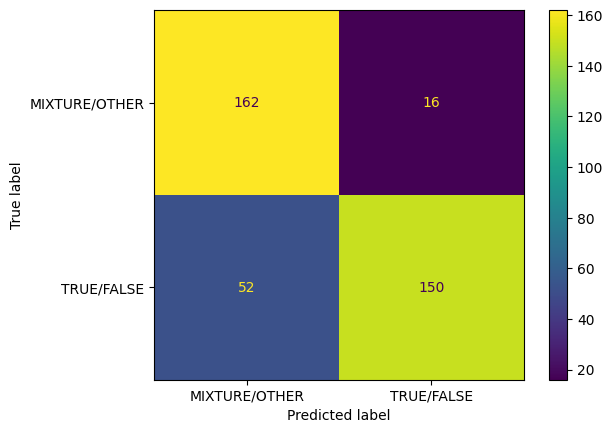

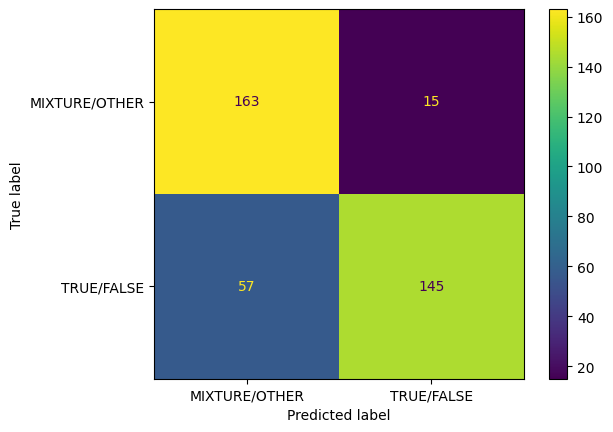

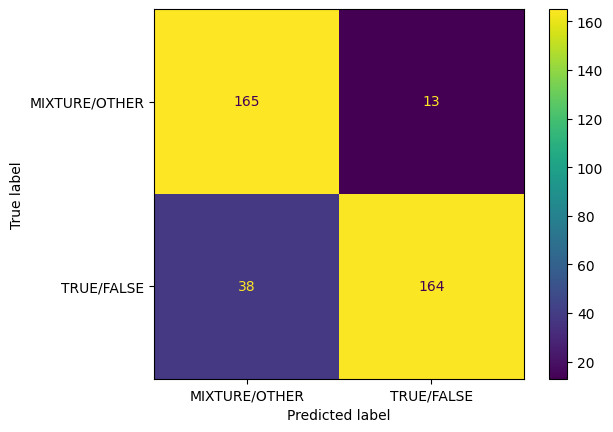

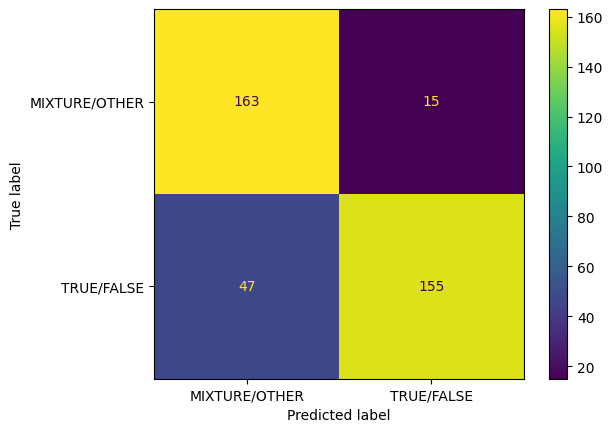

In [ ]:

np.random.seed(42)  # Set the random seed for NumPy
print("y_train", y_train.shape)
print("y_test", y_test.shape)
#X_test = np.ravel(X_test)
print("X_test", X_test.shape)
# le plus simple est de faire un test sur differents pipelines.  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_title_SVC = []
X_test_title_SVC = []

X_train_title_RandomForestClassifier = []
X_test_title_RandomForestClassifier = []


for name, pipeline in all_models :
    X_train_title_SVC.append(pipeline.fit_transform(X_train).toarray())
    X_test_title_SVC.append(pipeline.transform(X_test).toarray())
    X_train_title_RandomForestClassifier.append(pipeline.fit_transform(X_train).toarray())
    X_test_title_RandomForestClassifier.append(pipeline.transform(X_test).toarray())




models = {
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_title = eval('X_train_title_' + model_name)
    X_test_title = eval('X_test_title_' + model_name)
    for i in range (len(X_train_title)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      print("X_train",X_train_title[i].shape)
      print("y_train",y_train.shape)
      grid_search.fit(X_train_title[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_title[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

###**Etape 3 : Classification selon la colonne TEXT**

Application d'entités nommées

In [ ]:
nlp = spacy.load("en_core_web_sm")
texte=dftrain['text']
#Créer une liste pour stocker les entités nommées
entities = []
# Traiter chaque texte individuellement et ajouter les entités à la liste
for phrase in texte:
    phrase_str = str(phrase)  # Convertir l'élément en chaîne de caractères
    doc = nlp(phrase_str)
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))


# Afficher les entités nommées
for entity in entities:
    print(entity[0], entity[1])
    




Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Last September DATE
several hundred CARDINAL
John F. Kennedy Memorial Airport PERSON
Ashland GPE
a few miles QUANTITY
GTac GPE
Kennedy PERSON
1963 DATE
One CARDINAL
Mike Wiggins Jr. PERSON
the Bad River LOC
Bad River LOC
Lake Superior LOC
Wiggins PERSON
Walker PERSON
Wisconsin GPE
the State Capitol ORG
Madison GPE
hundreds of thousands CARDINAL
the Bad River LOC
The Bad River LOC
Northern Wisconsin LOC
Last June DATE
one CARDINAL
GTac PERSON
Arizona GPE
Chippewa PERSON
seven CARDINAL
first ORDINAL
35 years DATE
Last summer DATE
Wiggins PERSON
Walker PERSON
Kennedy PERSON
Wiggins PERSON
Kennedy PERSON
Walker PERSON
GTac PERSON
Department of Natural Resources ORG
GTac PERSON
Bill Williams PERSON
Spain GPE
GTac GPE
Williams PERSON
Wiggins PERSON
five CARDINAL
Last August DATE
Obama PERSON
the Interior Department ORG
GTac GPE
five years ago DATE
Obama PERSON
nearly 400 CARDINAL
Native American NORP
this White Hou

In [ ]:
dftrain["text"] = dftrain["text"].astype(str)

# Appliquer la fonction à la colonne "text"
dftrain["text"] = dftrain["text"].apply(add_entity_name)

print(dftrain["text"])

847     Also on the naughty list were Christmas (DATE)...
447     The number of people applying for UK (GPE) uni...
2243    Unvaccinated Children Pose No Risk To Anyone ,...
1202    Australia (GPE) ’s Great (WORK_OF_ART) Barrier...
1059    One (CARDINAL) in ten (CARDINAL) patients admi...
                              ...                        
637     As Democrats (NORP) basked in the glory of the...
1022    HON (ORG) . STEFAN (PERSON) I. (PERSON) MYCHAJ...
1515    We ’ve reported on numerous events identified ...
1432    The 2021 (QUANTITY) Act (QUANTITY) on Climate ...
628     Antibody tests support what ’s been obvious : ...
Name: text, Length: 1900, dtype: object


On scinde notre jeu de données en jeu de test et jeux d'apprentissage

In [ ]:
X=dftrain['text']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is \n",X_train.shape)
print("y_train is \n",y_train.shape)
print("X_test is \n",X_test.shape)
print("y_test is \n",y_test.shape)

X_train is 
 (1520,)
y_train is 
 (1520,)
X_test is 
 (380,)
y_test is 
 (380,)


Ici, c'est une étape importante, on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:

score = 'accuracy'
seed = 7
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]


models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

                        
# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))
    #pipeline.fit(X_train_text,y_train)
all_results=[]
scores=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    
#    print ("Evaluation de ",p)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train,y_train, cv=kfold, scoring=score)
    #print("Pour le classifieur",p[0],"on a un score de",cv_results.mean(),"et un écart type de",cv_results.std())
    scores.append(cv_results)
    names.append(p[0])

    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)
    # affichage des résultats
#print ('\nLe meilleur resultat : ',max(results))


Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC())])
all resultats [('RF', 0.8710526315789474, 0.043857456085523605), ('SVM', 0.8697368421052631, 0.028646764548785834), ('CART', 0.8578947368421053, 0.031578947368421054), ('LogisticRegression', 0.807894736842105

On affiche les boites à moustache pour mieux visualiser les résultats

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

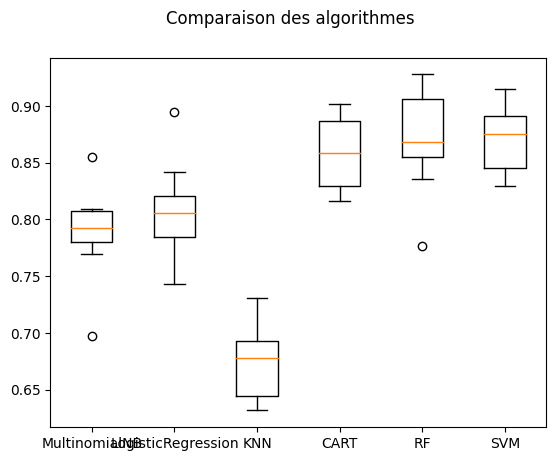

In [ ]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

y_train (1520,)
y_test (380,)
X_test (380,)
grid search fait
X_train (1520, 29277)
y_train (1520,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits
meilleur score 0.857 

meilleur estimateur SVC(C=2, random_state=42) 

Accuracy : 0.903
Classification Report
               precision    recall  f1-score   support

MIXTURE/OTHER    0.89385   0.89888   0.89636       178
   TRUE/FALSE    0.91045   0.90594   0.90819       202

     accuracy                        0.90263       380
    macro avg    0.90215   0.90241   0.90227       380
 weighted avg    0.90268   0.90263   0.90265       380

Ensemble des meilleurs paramètres :
	C: 2
	gamma: 'scale'
	kernel: 'rbf'
grid search fait
X_train (1520, 29142)
y_train (1520,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits
meilleur score 0.857 

meilleur estimateur SVC(C=2, random_state=42) 

Accuracy : 0.905
Classification Report
               precision    recall  f1-score   support

MIXTURE/OTHER    0.89888   0.89888   0.898

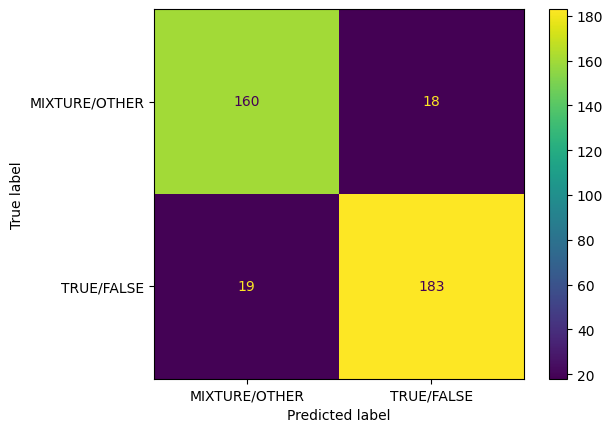

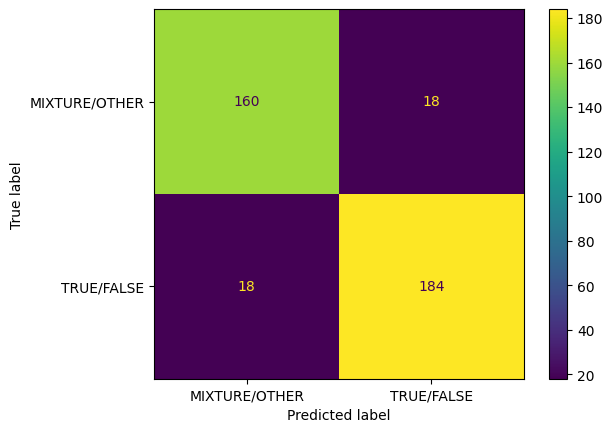

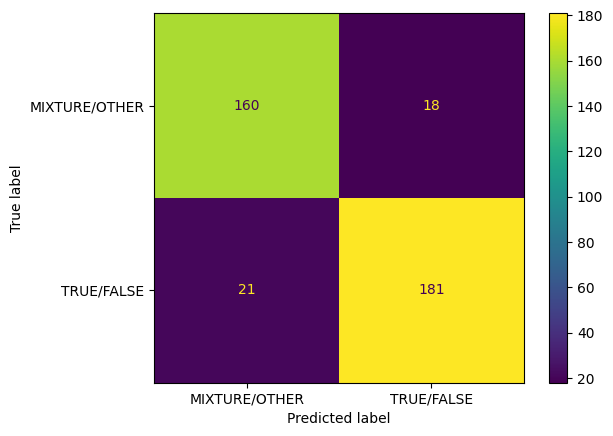

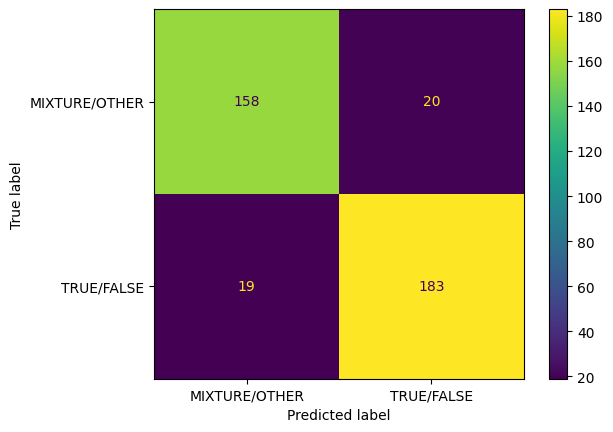

In [ ]:
from sklearn.model_selection import GridSearchCV


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from tabulate import tabulate
import numpy as np
np.random.seed(42)  # Set the random seed for NumPy
print("y_train", y_train.shape)
print("y_test", y_test.shape)
#X_test = np.ravel(X_test)
print("X_test", X_test.shape)
# le plus simple est de faire un test sur differents pipelines.  


# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_title_SVC = []
X_test_title_SVC = []




for name, pipeline in all_models :
    X_train_title_SVC.append(pipeline.fit_transform(X_train).toarray())
    X_test_title_SVC.append(pipeline.transform(X_test).toarray())
   


models = {
    'SVC': SVC(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3]},
             {'kernel': ['linear', 'rbf']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_title = eval('X_train_title_' + model_name)
    X_test_title = eval('X_test_title_' + model_name)
    for i in range (len(X_train_title)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      print("X_train",X_train_title[i].shape)
      print("y_train",y_train.shape)
      grid_search.fit(X_train_title[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_title[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

### **Etape 4 : Classification selon la colonne Text_title (concaténation de la colonne text et la colonne title) :**

On concatène les deux colonnes text et titre de note DataFrame dftrain

In [ ]:
text_title = dftrain.apply(lambda x : '{} {}'.format(x['text'],x['title']),axis=1)
dftrain['text_title'] = text_title
X_text_title = dftrain.iloc[0:,-1]
X_text_title.reset_index(drop = True, inplace = True)

Ici, Pas besoin d'appliquer les entités entité dans cette étape vu qu'on les a appliqué sur les colonnes texte et title et ici on les concaténes donc on les a automatiquement



On scinde notre jeu de données en jeu d'apprentissage et jeu de test

In [ ]:
X=dftrain['text_title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is \n",X_train.shape)
print("y_train is \n",y_train.shape)
print("X_test is \n",X_test.shape)
print("y_test is \n",y_test.shape)

Ici, c'est une étape importante, on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur

In [ ]:
score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]


#models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', SVC(random_state=42)))

# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))

all_results=[]
scores=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    
#    print ("Evaluation de ",p)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train,y_train, cv=kfold, scoring=score)
    scores.append(cv_results)
    names.append(p[0])
    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


print("all resultats", all_results)

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)
    # affichage des résultats
#print ('\nLe meilleur resultat : ',max(results))


Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('MultinomialNB', 0.7861842105263157, 0.04464483572979879), ('LogisticRegression', 0.8144736842105263, 0.04291975376394759), ('KNN', 0.6848684210526

On affiche les boites à moustache pour mieux visualiser les résultats

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

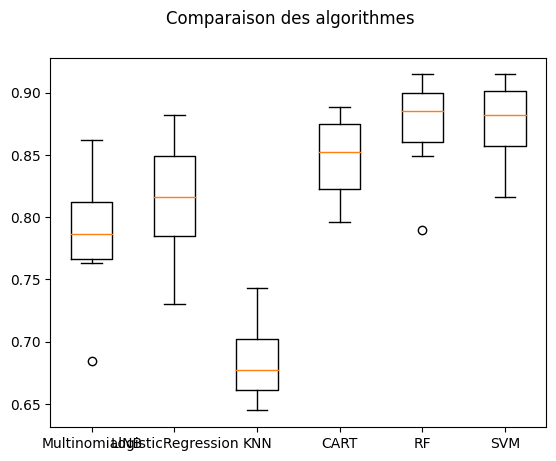

In [ ]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

grid search fait
X_train (1520, 29939)
y_train (1520,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits
meilleur score 0.857 

meilleur estimateur SVC(C=2, random_state=42) 

Accuracy : 0.897
Classification Report
               precision    recall  f1-score   support

MIXTURE/OTHER    0.89266   0.88764   0.89014       178
   TRUE/FALSE    0.90148   0.90594   0.90370       202

     accuracy                        0.89737       380
    macro avg    0.89707   0.89679   0.89692       380
 weighted avg    0.89735   0.89737   0.89735       380

Ensemble des meilleurs paramètres :
	C: 2
	gamma: 'scale'
	kernel: 'rbf'
grid search fait
X_train (1520, 29804)
y_train (1520,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits
meilleur score 0.859 

meilleur estimateur SVC(C=2, random_state=42) 

Accuracy : 0.897
Classification Report
               precision    recall  f1-score   support

MIXTURE/OTHER    0.89266   0.88764   0.89014       178
   TRUE/FALSE    0.90148   0.90

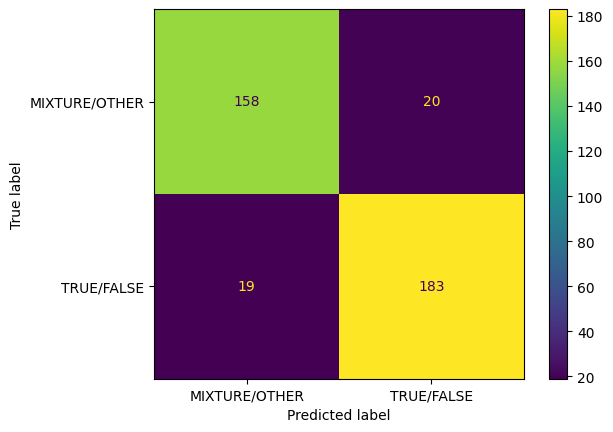

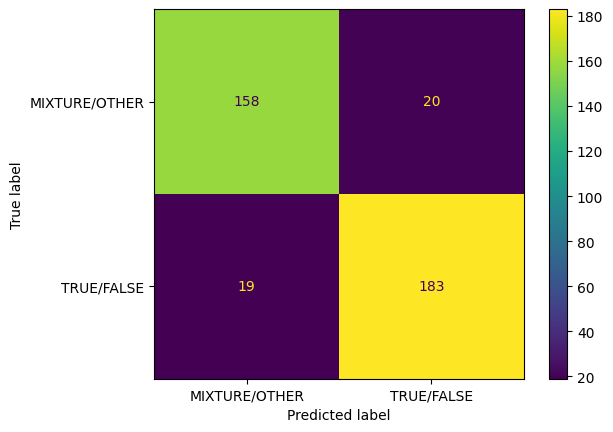

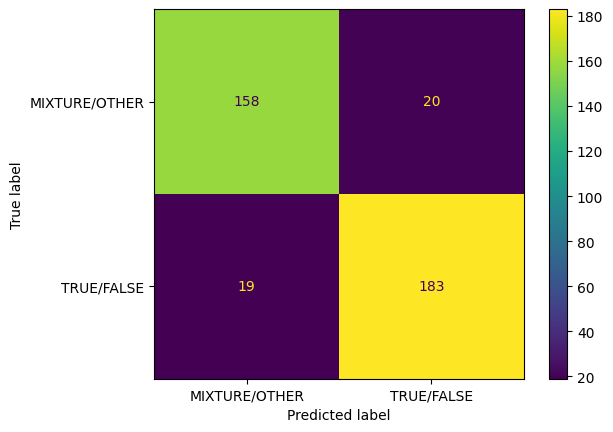

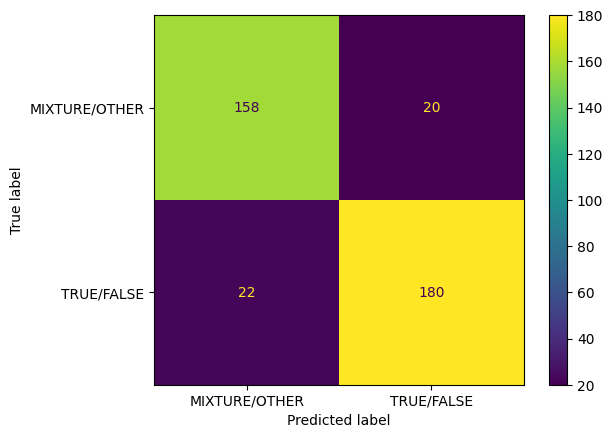

In [ ]:

np.random.seed(42)  # Set the random seed for NumPy

#X_test = np.ravel(X_test)
# le plus simple est de faire un test sur differents pipelines.  


# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_title_SVC = []
X_test_title_SVC = []




for name, pipeline in all_models :
    X_train_title_SVC.append(pipeline.fit_transform(X_train).toarray())
    X_test_title_SVC.append(pipeline.transform(X_test).toarray())
   


models = {
    'SVC': SVC(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3]},
             {'kernel': ['linear', 'rbf']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_title = eval('X_train_title_' + model_name)
    X_test_title = eval('X_test_title_' + model_name)
    for i in range (len(X_train_title)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      print("X_train",X_train_title[i].shape)
      print("y_train",y_train.shape)
      grid_search.fit(X_train_title[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_title[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

##**Seconde classification:  Other vs mixture**


On crée un nouveau dataframe avec que les lignes contenant dans la colonne rating les valeurs other et mixture

In [ ]:
dftrain = dftrainbase.loc[dftrainbase['rating'].isin(['other', 'mixture'])]
print(dftrain.shape)
print(dftrainbase.columns)
y = dftrain.iloc[:, -2]
print("les valeurs de OTHER et MIXTURE maintenant sont ", y.value_counts())


(950, 5)
Index(['id', 'text', 'title', 'rating', 'regrouped'], dtype='object')
les valeurs de OTHER et MIXTURE maintenant sont  mixture    716
other      234
Name: rating, dtype: int64


Le jeu de données étant déséquilibré, on a pensé à appliquer le downsampling pour équilibrer nos données. on séléctionne des lignes aléatoirement de TRUE/FALSE de telle sorte que le nombre de lignes de TRUE/FALSE soit = au nbr de lignes de Other. et on mélange le DataFrame

In [ ]:
# Compter le nombre d'observations dans chaque catégorie
mixture_count = dftrain['rating'].value_counts()['mixture']
other_count = dftrain['rating'].value_counts()['other']

# Trouver le nombre minimum d'observations parmi les catégories
min_count = min( mixture_count, other_count)

# Sous-échantillonner les catégories pour équilibrer les quantités
mixture_sampled = dftrain[dftrain['rating'] == 'mixture'].sample(min_count, random_state=42)
other_sampled = dftrain[dftrain['rating'] == 'other'].sample(min_count, random_state=42)


# Concaténer les échantillons pour obtenir un nouveau dataframe équilibré
dftrain = pd.concat([mixture_sampled,other_sampled])

# Mélanger aléatoirement les données
dftrain = dftrain.sample(frac=1, random_state=42)
print(dftrain)
X_text=dftrain["text"]
X_title=dftrain["title"]
y=dftrain.iloc[0:,-2]
print("\n")
print("la taille de y_train est " ,y.shape)
print("\n")
print("les valeurs de OTHER et MIXTURE maintenant sont " ,y.value_counts())

            id                                               text  \
623   11aea5b0  By Jim Francesconi As we pass the governance t...   
717   897917f0  Free schools are the ‘modern engines of social...   
2398  282ff13b  More than 11,000 criminal trials in England an...   
676   347530a3  On Tuesday, radio show host John Fredricks sta...   
231   adc0db84  Duration 0:47 Villaraigosa talks high-speed ra...   
...        ...                                                ...   
1217  21d1d3f2  RETRACTION, Feb. 21, 2019: This Op-Ed has been...   
713   e22398b3  GETTY Leading economists are finally acknowled...   
652   964e13e1  Iran Parliamentarians have moved a bill in ord...   
889   905519d3  Diabetes prescriptions are costing the NHS in ...   
773   c94b8dc2  Jeb Bush Really Is His Own Man By Stephanie Sc...   

                                                  title   rating  \
623   DUP man dating Poots' daughter claims his 'tea...  mixture   
717   Kremlin calls new U.S. sancti

###**Etape 1 : Classification selon la colonne TITLE**

On divise notre grand X en jeu de données d'apprentissage et de test (20% de test).

In [ ]:

X=dftrain["title"]
print(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is",X_train)
print("y_train is",y_train)
print("X_test is",X_test)
print("y_test is",y_test)

0       You Can Be Fined $1,500 If Your Passenger Is U...
1           Missouri lawmakers condemn Las Vegas shooting
2       CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...
3       Obama’s Daughters Caught on Camera Burning US ...
4       Leaked Visitor Logs Reveal Schiff’s 78 Visits ...
                              ...                        
2523    Taxman fails to answer four million calls a ye...
2524    Police catch 11‑year‑olds being used to sell d...
2525    Help to Buy Isa scandal: 500,000 first-time bu...
2526             A coke-snorting generation of hypocrites
2527             A coke-snorting generation of hypocrites
Name: title, Length: 2528, dtype: object
X_train is 497     Three-quarters of NHS maternity wards have no ...
2021    B.C. man with ALS chooses medically assisted d...
1032    Global warming data FAKED by government to fit...
1254    It's heartless to blame job losses on unemploy...
1734    Wealthy professionals most likely to drink reg...
                    

Tester avec plusieurs classifieurs classiques.

In [ ]:
np.random.seed(42)  # Set the random seed for NumPy

score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]


models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', SVC(random_state=42)))

# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))
    #pipeline.fit(X_train,y_train)
all_results=[]
scores=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    
#    print ("Evaluation de ",p)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train,y_train, cv=kfold, scoring=score)
    #print("Pour le classifieur",p[0],"on a un score de",cv_results.mean(),"et un écart type de",cv_results.std())
    scores.append(cv_results)
    names.append(p[0])

    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


print("all resultats", all_results)

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)

X_train (374,)
y_train (374,)
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('MultinomialNB', 0.7995732574679943, 0.06954201329457245), ('LogisticRegression', 0.8291607396870555, 0.0691480936575

Afifchage des boites à moustache pour mieux visualiser les résultats

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

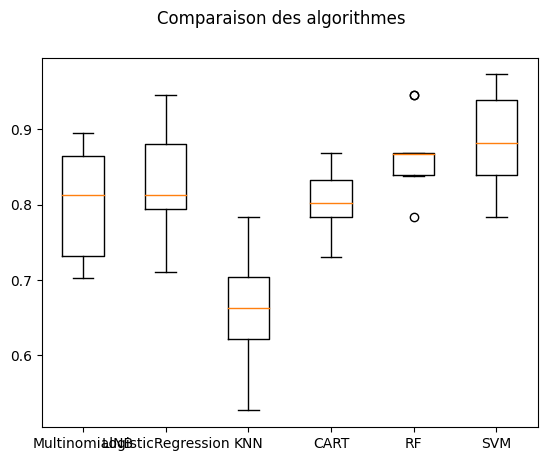

In [ ]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

#### Choisir les meilleurs paramètres et hyperparamètres pour SVM

y_train (374,)
y_test (94,)
X_test (94,)
grid search fait
X_train (374, 2565)
y_train (374,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits
meilleur score 0.858 

meilleur estimateur SVC(C=1, random_state=42) 

Accuracy : 0.926
Classification Report
              precision    recall  f1-score   support

     mixture    0.86667   0.97500   0.91765        40
       other    0.97959   0.88889   0.93204        54

    accuracy                        0.92553        94
   macro avg    0.92313   0.93194   0.92484        94
weighted avg    0.93154   0.92553   0.92591        94

Ensemble des meilleurs paramètres :
	C: 1
	gamma: 'scale'
	kernel: 'rbf'
grid search fait
X_train (374, 2445)
y_train (374,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits
meilleur score 0.853 

meilleur estimateur SVC(C=1, random_state=42) 

Accuracy : 0.915
Classification Report
              precision    recall  f1-score   support

     mixture    0.86364   0.95000   0.90476        40
    

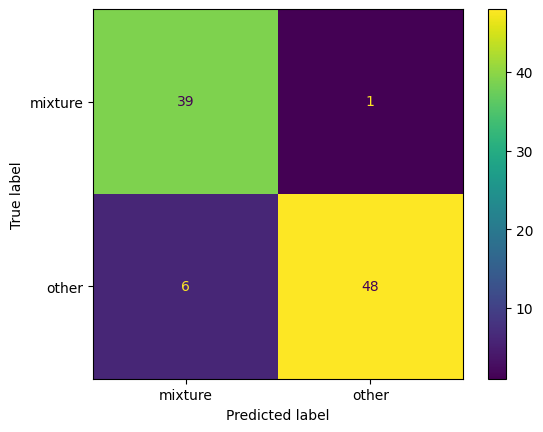

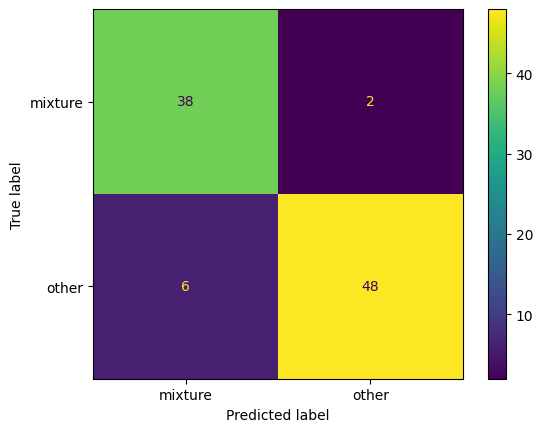

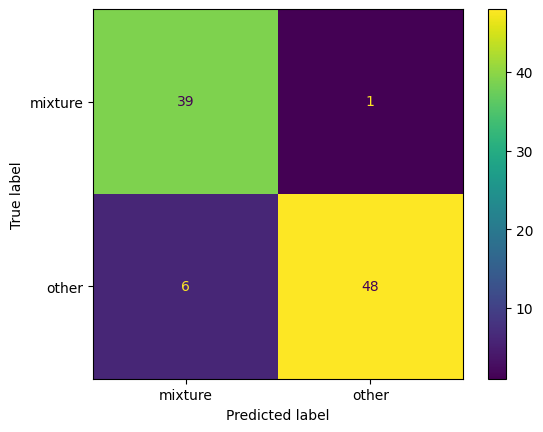

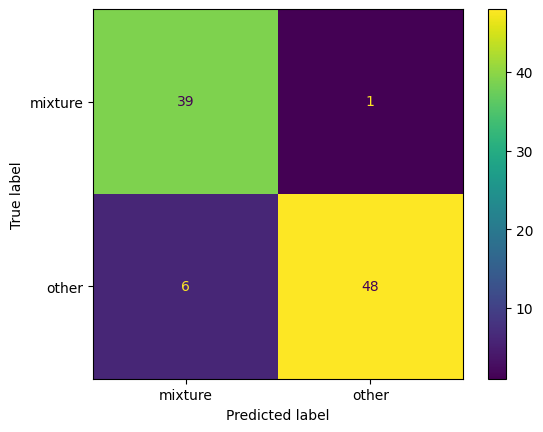

In [ ]:

np.random.seed(42)  # Set the random seed for NumPy
# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_title_SVC = []
X_test_title_SVC = []




for name, pipeline in all_models :
    X_train_title_SVC.append(pipeline.fit_transform(X_train).toarray())
    X_test_title_SVC.append(pipeline.transform(X_test).toarray())
   


models = {
    'SVC': SVC(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3]},
             {'kernel': ['linear', 'rbf']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_title = eval('X_train_title_' + model_name)
    X_test_title = eval('X_test_title_' + model_name)
    for i in range (len(X_train_title)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      print("X_train",X_train_title[i].shape)
      print("y_train",y_train.shape)
      grid_search.fit(X_train_title[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_title[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

###**Etape 2 : Classification selon la colonne TEXT**

On scinde notre jeu de données en jeu d'apprentissage et jeu de test




In [ ]:

X=dftrain["text"]
print(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is",X_train)
print("y_train is",y_train)
print("X_test is",X_test)
print("y_test is",y_test)

623     By Jim Francesconi As we pass the governance t...
717     Free schools are the ‘modern engines of social...
2398    More than 11,000 criminal trials in England an...
676     On Tuesday, radio show host John Fredricks sta...
231     Duration 0:47 Villaraigosa talks high-speed ra...
                              ...                        
1217    RETRACTION, Feb. 21, 2019: This Op-Ed has been...
713     GETTY Leading economists are finally acknowled...
652     Iran Parliamentarians have moved a bill in ord...
889     Diabetes prescriptions are costing the NHS in ...
773     Jeb Bush Really Is His Own Man By Stephanie Sc...
Name: text, Length: 468, dtype: object
X_train is 816     Climate crisis and logging is leading to shift...
328     Madison, WI…Speaker Robin Vos R-Rochester and ...
2456    The far-left ThinkProgress reports that scient...
258     November 11, 2020 Victims of Voter Fraud: Init...
1959    Hundreds of Nigerian women die every day of co...
                      

Affichage des boites à moustaches

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

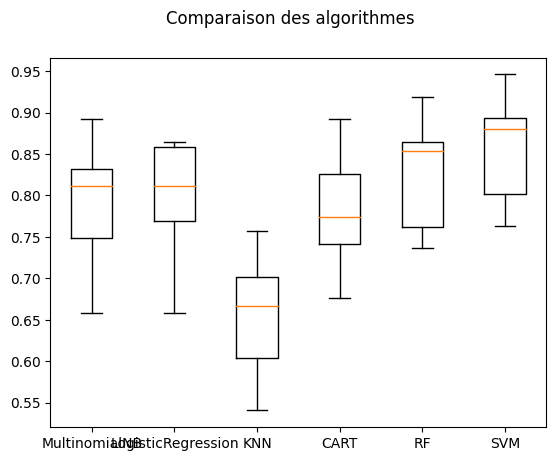

In [ ]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

y_train (374,)
y_test (94,)
X_test (94,)
grid search fait
X_train (374, 15205)
y_train (374,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits
meilleur score 0.845 

meilleur estimateur SVC(C=1, random_state=42) 

Accuracy : 0.915
Classification Report
              precision    recall  f1-score   support

     mixture    0.84783   0.97500   0.90698        40
       other    0.97917   0.87037   0.92157        54

    accuracy                        0.91489        94
   macro avg    0.91350   0.92269   0.91427        94
weighted avg    0.92328   0.91489   0.91536        94

Ensemble des meilleurs paramètres :
	C: 1
	gamma: 'scale'
	kernel: 'rbf'
grid search fait
X_train (374, 15067)
y_train (374,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits
meilleur score 0.850 

meilleur estimateur SVC(C=1, random_state=42) 

Accuracy : 0.926
Classification Report
              precision    recall  f1-score   support

     mixture    0.86667   0.97500   0.91765        40
  

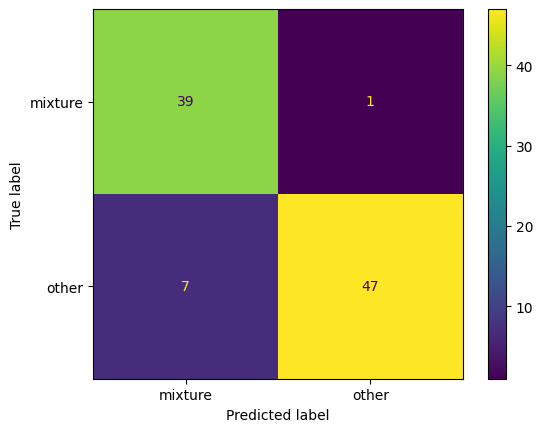

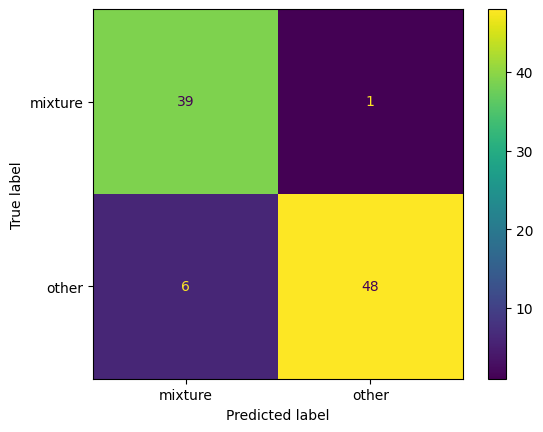

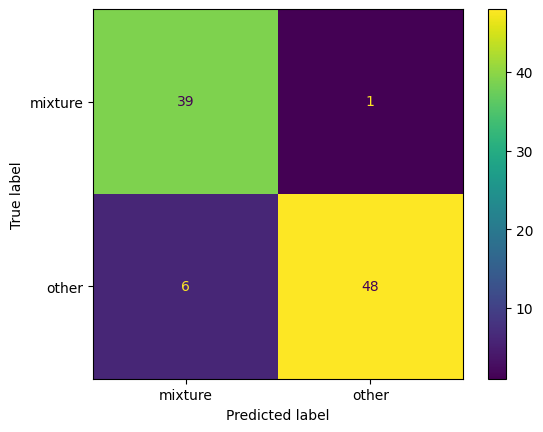

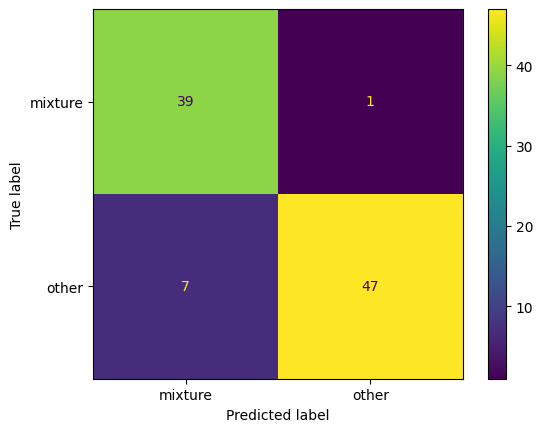

In [ ]:
np.random.seed(42)  # Set the random seed for NumPy
# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_title_SVC = []
X_test_title_SVC = []




for name, pipeline in all_models :
    X_train_title_SVC.append(pipeline.fit_transform(X_train).toarray())
    X_test_title_SVC.append(pipeline.transform(X_test).toarray())
   


models = {
    'SVC': SVC(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3]},
             {'kernel': ['linear', 'rbf']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_title = eval('X_train_title_' + model_name)
    X_test_title = eval('X_test_title_' + model_name)
    for i in range (len(X_train_title)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      print("X_train",X_train_title[i].shape)
      print("y_train",y_train.shape)
      grid_search.fit(X_train_title[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_title[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

###**Classification selon la colonne TEXT_TITLE**

On contactene la colonne titre et texte

In [ ]:
text_title = dftrain.apply(lambda x : '{} {}'.format(x['text'],x['title']),axis=1)

dftrain['text_title'] = text_title
X_text_title = dftrain.iloc[0:,-1]
X_text_title.reset_index(drop = True, inplace = True)

On scinde notre jeu de données en jeu d'apprentissage et jeu de test

In [ ]:

X=dftrain["text_title"]
print(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is",X_train)
print("y_train is",y_train)
print("X_test is",X_test)
print("y_test is",y_test)


623     By Jim Francesconi As we pass the governance t...
717     Free schools are the ‘modern engines of social...
2398    More than 11,000 criminal trials in England an...
676     On Tuesday, radio show host John Fredricks sta...
231     Duration 0:47 Villaraigosa talks high-speed ra...
                              ...                        
1217    RETRACTION, Feb. 21, 2019: This Op-Ed has been...
713     GETTY Leading economists are finally acknowled...
652     Iran Parliamentarians have moved a bill in ord...
889     Diabetes prescriptions are costing the NHS in ...
773     Jeb Bush Really Is His Own Man By Stephanie Sc...
Name: text_title, Length: 468, dtype: object
X_train is 816     Climate crisis and logging is leading to shift...
328     Madison, WI…Speaker Robin Vos R-Rochester and ...
2456    The far-left ThinkProgress reports that scient...
258     November 11, 2020 Victims of Voter Fraud: Init...
1959    Hundreds of Nigerian women die every day of co...
                

Ici, c'est une étape importante, on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:
score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]


#models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', SVC(random_state=42)))

# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))

all_results=[]
scores=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    
#    print ("Evaluation de ",p)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train,y_train, cv=kfold, scoring=score)
    scores.append(cv_results)
    names.append(p[0])
    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


print("all resultats", all_results)

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)
    # affichage des résultats
#print ('\nLe meilleur resultat : ',max(results))


Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('MultinomialNB', 0.7866287339971552, 0.0689717093735457), ('LogisticRegression', 0.8054054054054054, 0.07269404515568734), ('KNN', 0.64125177809388

On affiche les accuracy de chaque classifieur, on remarque la médiane (en rouge) de chaque et l'écart type aussi.

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

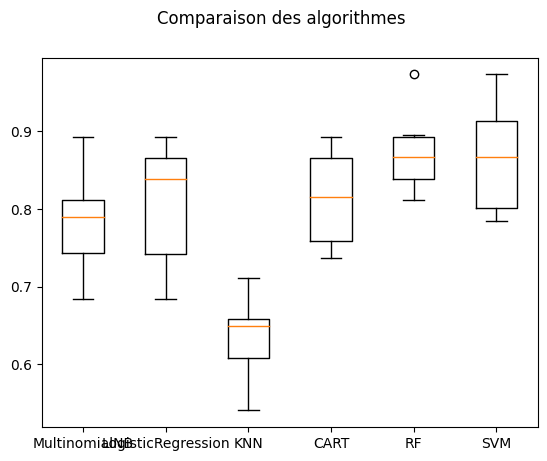

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

y_train (374,)
y_test (94,)
X_test (94,)
grid search fait
X_train (374, 15575)
y_train (374,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits
meilleur score 0.848 

meilleur estimateur SVC(C=1, random_state=42) 

Accuracy : 0.915
Classification Report
              precision    recall  f1-score   support

     mixture    0.84783   0.97500   0.90698        40
       other    0.97917   0.87037   0.92157        54

    accuracy                        0.91489        94
   macro avg    0.91350   0.92269   0.91427        94
weighted avg    0.92328   0.91489   0.91536        94

Ensemble des meilleurs paramètres :
	C: 1
	gamma: 'scale'
	kernel: 'rbf'
grid search fait
X_train (374, 15437)
y_train (374,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits
meilleur score 0.853 

meilleur estimateur SVC(C=2, random_state=42) 

Accuracy : 0.926
Classification Report
              precision    recall  f1-score   support

     mixture    0.86667   0.97500   0.91765        40
  

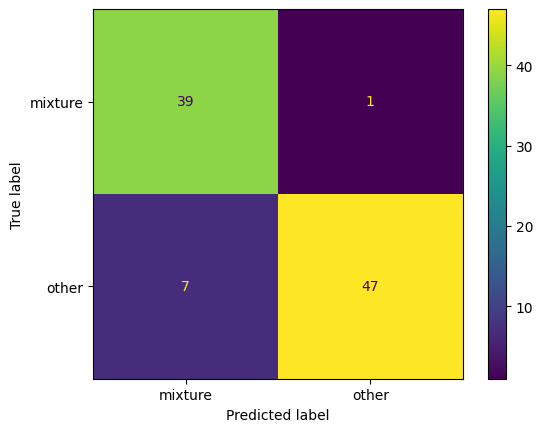

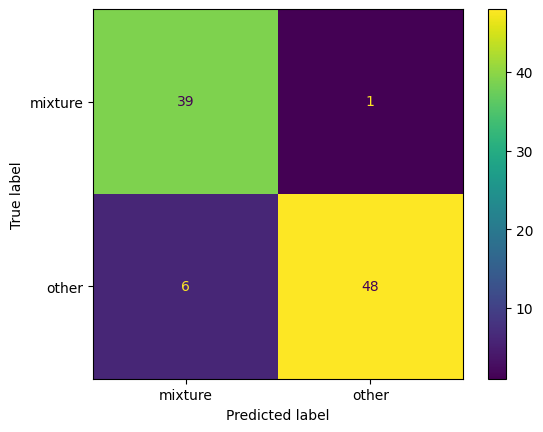

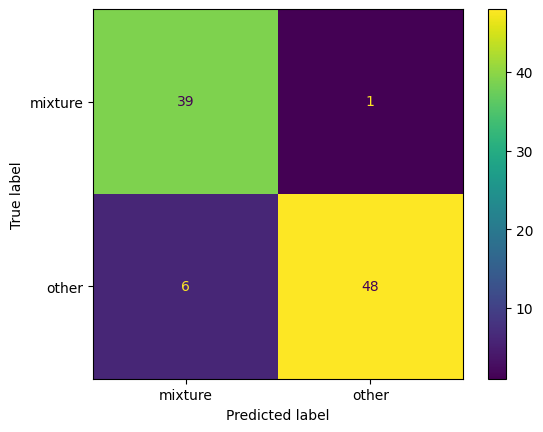

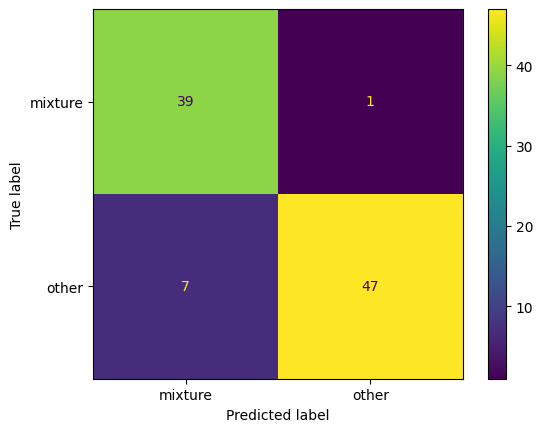

In [ ]:
from sklearn.model_selection import GridSearchCV


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from tabulate import tabulate
import numpy as np
np.random.seed(42)  # Set the random seed for NumPy
print("y_train", y_train.shape)
print("y_test", y_test.shape)
#X_test = np.ravel(X_test)
print("X_test", X_test.shape)
# le plus simple est de faire un test sur differents pipelines.  


# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_title_SVC = []
X_test_title_SVC = []




for name, pipeline in all_models :
    X_train_title_SVC.append(pipeline.fit_transform(X_train).toarray())
    X_test_title_SVC.append(pipeline.transform(X_test).toarray())
   


models = {
    'SVC': SVC(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3]},
             {'kernel': ['linear', 'rbf']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_title = eval('X_train_title_' + model_name)
    X_test_title = eval('X_test_title_' + model_name)
    for i in range (len(X_train_title)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      print("X_train",X_train_title[i].shape)
      print("y_train",y_train.shape)
      grid_search.fit(X_train_title[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_title[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

##**Classification de FALSE/TRUE avec les meilleurs prétraitements et meilleurs paramètres**

In [ ]:
dftrain = dftrainbase.loc[dftrainbase['rating'].isin(['TRUE', 'FALSE'])]
y=dftrain.iloc[0:,-2]
print(y)
print("les valeurs de TRUE et FALSE maintenant sont " ,y.value_counts())

0       FALSE
3       FALSE
4       FALSE
6       FALSE
7       FALSE
        ...  
2523     TRUE
2524     TRUE
2525    FALSE
2526     TRUE
2527     TRUE
Name: rating, Length: 1578, dtype: object
les valeurs de TRUE et FALSE maintenant sont  FALSE    1156
TRUE      422
Name: rating, dtype: int64


In [ ]:
# Compter le nombre d'observations dans chaque catégorie
df_true = dftrain[dftrain['rating']=="TRUE"]
df_false = dftrain[dftrain['rating']=="FALSE"]

# Sous-échantillonner la classe majoritaire (FALSE) pour obtenir un nombre égal d'échantillons pour chaque classe
df_false_subsampled = df_false.sample(n=len(df_true), random_state=42)

# Concaténer les deux dataframes
dftrain = pd.concat([df_false_subsampled, df_true])

# Mélanger aléatoirement les données
dftrain = dftrain.sample(frac=1, random_state=42)



X_text=dftrain["text"]
X_title=dftrain["title"]
print("La taille de X_text",X_text.shape)
y=dftrain.iloc[0:,-2]
print(y.shape)
print("\n")
print("la taille de y est " ,y.shape)
print("\n")
print("les valeurs de TRUE et FALSE maintenant sont " ,y.value_counts())


La taille de X_text (844,)
(844,)


la taille de y est  (844,)


les valeurs de TRUE et FALSE maintenant sont  TRUE     422
FALSE    422
Name: rating, dtype: int64


In [ ]:
dftrain['text'] = dftrain['text'].apply(add_entity_name)


In [ ]:

X=dftrain.iloc[0:, 1:3]
print(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is",X_train)
print("y_train is",y_train)
print("X_test is",X_test)
print("y_test is",y_test)
y_test_1 = y_test

                                                   text  \
615   It ’s been a long time coming , but finally we...   
1303  Constitutional Attorney Matthew (PERSON) DePer...   
1232  The (GPE) United (GPE) States (GPE) is witness...   
2022  After three (DATE) decades (DATE) on the bench...   
287   Based on actual results and accounting for sta...   
...                                                 ...   
1006  5 (MONEY) Million (MONEY) Muslim (MONEY) Child...   
1543  The bombshell claim comes from over (TIME) 20 ...   
853   BILL (ORG) GATES (ORG) EXPLAINS (ORG) THAT (OR...   
296   Let our journalists help you make sense of the...   
1325  Though the whole world relies on RT (ORG) - (O...   

                                                  title  
615   JK Rowling Confirms Stance Against Transgender...  
1303  MI Sec of State Official Caught On Video Telli...  
1232  What science can tell us about the links betwe...  
2022        Sarah Parker leaves legacy on Supreme Court  
2

In [ ]:
# création du pipeline en ajoutant le classifier
pipe = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ("SVM", SVC(C=2, gamma='scale', kernel='rbf', random_state=42))])
pipetexte=pipe.fit(X_train["text"],y_train)
print("à présent",y_train)

#save pipe
print("pipeline créé")

à présent 1867     TRUE
1540    FALSE
2495     TRUE
1197     TRUE
788      TRUE
        ...  
2224     TRUE
2424     TRUE
2038     TRUE
1295     TRUE
1890     TRUE
Name: rating, Length: 675, dtype: object
pipeline créé


Résultats de la classification selon True et False

360     Then - Secretary of State (ORG) Hillary (PERSO...
1216    Story highlights Global (LOC) sea (LOC) level ...
2466    Australia (GPE) ’s Great (WORK_OF_ART) Barrier...
1757    News| [ email protected ] “ If you wo n’t lead...
1387    For once , it ’s not President Trump (PERSON) ...
                              ...                        
2435    The oldest and thickest sea ice in the Arctic ...
523     A coalition of civil society groups has descri...
2127    A coalition of civil society groups has descri...
247     With merchants in Democrat (NORP) - run cities...
615     It ’s been a long time coming , but finally we...
Name: text, Length: 169, dtype: object
Accuracy : 0.941
Classification Report
              precision    recall  f1-score   support

       FALSE    0.92941   0.95181   0.94048        83
        TRUE    0.95238   0.93023   0.94118        86

    accuracy                        0.94083       169
   macro avg    0.94090   0.94102   0.94083       169
weighted avg

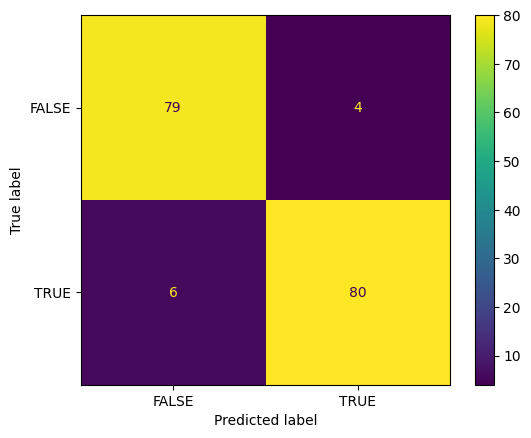

In [ ]:
X_test_text=X_test['text']
print(X_test_text)
y_pred_1=pipetexte.predict(X_test_text)
MyshowAllScores(y_test,y_pred_1)

##**Classification de OTHER/MIXTURE avec les meilleurs prétraitements et meilleurs paramètres**

In [ ]:
dftrain = dftrainbase.loc[dftrainbase['rating'].isin(['other', 'mixture'])]
y=dftrain.iloc[0:,-2]
print(y)
print("les valeurs de MIXTURE et OTHER maintenant sont " ,y.value_counts())

1       mixture
2       mixture
5         other
10      mixture
13      mixture
         ...   
2517    mixture
2518    mixture
2519    mixture
2520    mixture
2522      other
Name: rating, Length: 950, dtype: object
les valeurs de MIXTURE et OTHER maintenant sont  mixture    716
other      234
Name: rating, dtype: int64


In [ ]:
# Compter le nombre d'observations dans chaque catégorie
mixture_count = dftrain['rating'].value_counts()['mixture']
other_count = dftrain['rating'].value_counts()['other']

# Trouver le nombre minimum d'observations parmi les catégories
min_count = min( mixture_count, other_count)

# Sous-échantillonner les catégories pour équilibrer les quantités
mixture_sampled = dftrain[dftrain['rating'] == 'mixture'].sample(min_count, random_state=42)
other_sampled = dftrain[dftrain['rating'] == 'other'].sample(min_count, random_state=42)


# Concaténer les échantillons pour obtenir un nouveau dataframe équilibré
dftrain = pd.concat([mixture_sampled,other_sampled])

# Mélanger aléatoirement les données
dftrain = dftrain.sample(frac=1, random_state=42)
X_text=dftrain["text"]
X_title=dftrain["title"]
y=dftrain.iloc[0:,-2]
print("\n")
print("la taille de y_train est " ,y.shape)
print("\n")
print("les valeurs de OTHER et MIXTURE maintenant sont " ,y.value_counts())



la taille de y_train est  (468,)


les valeurs de OTHER et MIXTURE maintenant sont  mixture    234
other      234
Name: rating, dtype: int64


In [ ]:
dftrain['title'] = dftrain['title'].apply(add_entity_name)


In [ ]:

X=dftrain["title"]
print(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is",X_train)
print("y_train is",y_train)
print("X_test is",X_test)
print("y_test is",y_test)
y_test_2 = y_test

623     DUP man dating Poots ' daughter claims his ' t...
717     Kremlin (ORG) calls new U.S. (GPE) sanctions i...
2398    Thousands (CARDINAL) of trials end over no - s...
676     Warren (PERSON) Statement (PERSON) on Boeing (...
231     Antonio (PERSON) Villaraigosa (PERSON) rips Ga...
                              ...                        
1217    [ RETRACTED ] Media Hysteria : Climate Change ...
713     With Stickers , a Petition and Even a Middle N...
652     Opportunities Foreclosed Equity Denied New (GP...
889     Renationalising railways supported by almost (...
773     Putin (PERSON) oversees hypersonic weapon test...
Name: title, Length: 468, dtype: object
X_train is 816     Zakharova (ORG) Says New (ORG) Salisbury (ORG)...
328     Rep. Vos (PERSON) , Sen. Fitzgerald (PERSON) :...
2456    Nolte (PERSON) : Scientists Prove Man - Made G...
258     Victims of Voter Fraud : Initial (WORK_OF_ART)...
1959    18 (DATE) - (DATE) Year (DATE) - (DATE) Old (D...
                     

In [ ]:
# création du pipeline en ajoutant le classifier
pipe =  Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ("SVM", SVC(C=2, gamma='scale', kernel='rbf', random_state=42))])
pipetexte=pipe.fit(X_train,y_train)
print("à présent",y_train)

#save pipe
print("pipeline créé")

à présent 816       other
328     mixture
2456    mixture
258     mixture
1959    mixture
         ...   
1952    mixture
1518    mixture
1977      other
883     mixture
168     mixture
Name: rating, Length: 374, dtype: object
pipeline créé


1390    Biden (ORG) Accepts (ORG) Campaign (ORG) Donat...
424                        Smoke (NORP) fags , save lives
2170    European (ORG) Court (ORG) of (ORG) Killers (O...
1155    When Will The (WORK_OF_ART) Planet (WORK_OF_AR...
335     Wasserman (PERSON) Schultz (PERSON) considerin...
                              ...                        
1209    DELINGPOLE : ‘ Nearly All ’ Recent Global Warm...
599     Man claims there is a ' GHOST ' of a little gi...
1111    Kids do n't play a ' significant role ' in spr...
2386    Pervs (ORG) ' aged five (CARDINAL) School (ORG...
2385    London (GPE) 's most miserable boroughs reveal...
Name: title, Length: 94, dtype: object
Accuracy : 0.926
Classification Report
              precision    recall  f1-score   support

     mixture    0.86667   0.97500   0.91765        40
       other    0.97959   0.88889   0.93204        54

    accuracy                        0.92553        94
   macro avg    0.92313   0.93194   0.92484        94
weighted avg

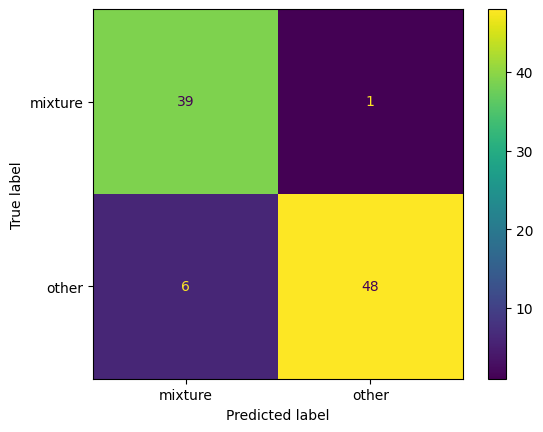

In [ ]:
X_test_text=X_test
print(X_test_text)
y_pred_2=pipetexte.predict(X_test_text)
MyshowAllScores(y_test,y_pred_2)

##**Concaténons les résultats des deux classifications**

Accuracy : 0.935
Classification Report
              precision    recall  f1-score   support

       FALSE    0.92941   0.95181   0.94048        83
        TRUE    0.95238   0.93023   0.94118        86
     mixture    0.86667   0.97500   0.91765        40
       other    0.97959   0.88889   0.93204        54

    accuracy                        0.93536       263
   macro avg    0.93201   0.93648   0.93283       263
weighted avg    0.93768   0.93536   0.93550       263



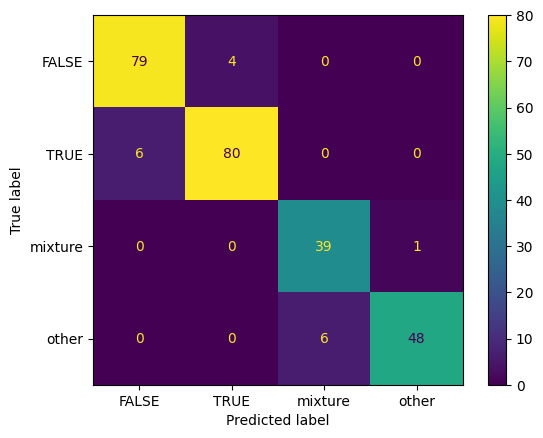

In [ ]:
# Conversion de tableaux NumPy en objets Series Pandas
y_pred_1 = pd.Series(y_pred_1)
y_pred_2 = pd.Series(y_pred_2)
#concat
y_pred_final = pd.concat([y_pred_1, y_pred_2], ignore_index=True)
y_test_final = pd.concat([y_test_1, y_test_2], ignore_index=True)
#dernier test
MyshowAllScores(y_test_final,y_pred_final)